# Union Territories without Legislature

In [ ]:
# Modeling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_excel('merged_dataset.xlsx')  # Load your data here

In [ ]:
df.head()

,Year,CHANDIGARH_Receipts,ANDAMAN AND NICOBAR ISLANDS_Receipts,DADRA AND NAGAR HAVELI DAMAN AND DIU_Receipts,LAKSHADWEEP_Receipts,LADAKH _Receipts,Total_Receipts,CHANDIGARH_Expenditures,ANDAMAN AND NICOBAR ISLANDS_Expenditures,DADRA AND NAGAR HAVELI DAMAN AND DIU_Expenditures,LAKSHADWEEP_Expenditures,LADAKH _Expenditures,Total_Expenditures
0,1998-01-01,425.00,95.72,615.78,8.65,0.0,615.78,545.40,604.20,137.30,137.30,0.0,1404.00
1,1999-01-01,473.00,88.92,683.41,9.03,0.0,683.41,632.16,631.50,162.27,162.27,0.0,1565.81
2,2000-01-01,495.00,90.99,728.29,9.42,0.0,728.29,676.64,698.00,196.27,196.27,0.0,1719.63
3,2001-01-01,544.82,96.60,826.41,13.00,0.0,826.41,702.50,782.23,257.58,257.58,0.0,1901.84
4,2002-01-01,684.99,93.78,1020.66,18.10,0.0,1020.66,758.35,885.00,253.19,253.19,0.0,2080.04


In [ ]:
# Modification just to plot data

In [ ]:
# Convert the 'Year' column to datetime
# Convert the 'Year' column to datetime
df['Year'] = pd.to_datetime(df['Year'])

In [ ]:
import plotly.express as px

In [ ]:
# Melt the DataFrame to long format
melted_df = df.melt(id_vars=['Year'], var_name='Type', value_name='Amount')

In [ ]:
# Create the interactive plot
fig = px.line(melted_df, x='Year', y='Amount', color='Type', title='Receipts and Expenditures Over the Years')
# Update the layout to position the legend at the bottom
fig.update_layout(legend_title_text='Rgions', legend=dict(orientation="h", yanchor="bottom", y=-0.5, xanchor="center", x=0.5))

# Show the plot
fig.show()

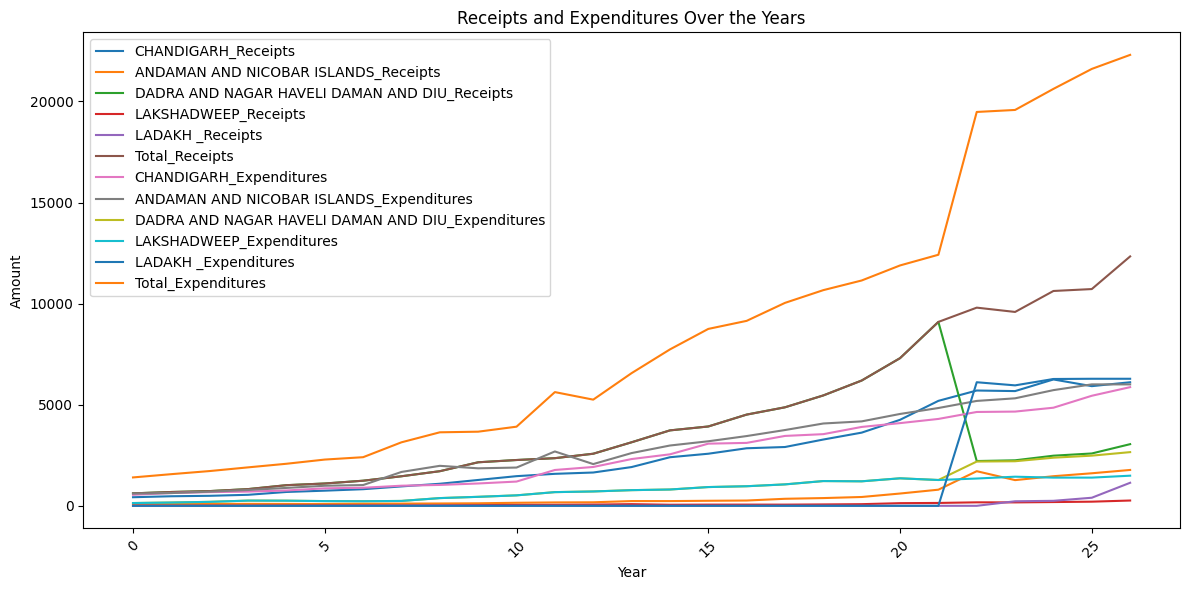

In [ ]:
# # Create a plot for Receipts and Expenditures
# plt.figure(figsize=(12, 6))

# # Plot all receipts
# for column in merged_df.columns:
#     if 'Receipts' in column:
#         plt.plot(merged_df.index, merged_df[column], label=column)

# # Plot all expenditures
# for column in merged_df.columns:
#     if 'Expenditures' in column:
#         plt.plot(merged_df.index, merged_df[column], label=column)

# # Adding Titles and Labels
# plt.title('Receipts and Expenditures Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Amount')
# plt.legend(loc='upper left')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [ ]:
# Normalize receipts and expenditures
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:].values)  # Normalize all columns except Year


In [ ]:
# df.iloc[:, 1:] # jusct to check if year is dropped or not

In [ ]:
# Prepare data sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [ ]:
# Set sequence length (e.g., number of past years to consider)
seq_length = 3
X, y = create_sequences(scaled_data, seq_length)

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# RNN model

In [ ]:
# Build the RNN model
model_RNN = Sequential()
model_RNN.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define the input shape with Input layer
model_RNN.add(SimpleRNN(50, activation='relu'))
model_RNN.add(Dense(y_train.shape[1]))  # Output layer for each region's receipts/expenditures
model_RNN.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Step 4: Train the model
model_RNN.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4282
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1326 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0669 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0449 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0142 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 

In [ ]:
# Make predictions
predictions = model_RNN.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


In [ ]:
# Inverse transform predictions to original scale
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Display predictions
predicted_df = pd.DataFrame(predictions, columns=df.columns[1:])  # Adjust according to your regions
print("Predicted Receipts and Expenditures for Next Year:")
predicted_df

Predicted Receipts and Expenditures for Next Year:


,CHANDIGARH_Receipts,ANDAMAN AND NICOBAR ISLANDS_Receipts,DADRA AND NAGAR HAVELI DAMAN AND DIU_Receipts,LAKSHADWEEP_Receipts,LADAKH _Receipts,Total_Receipts,CHANDIGARH_Expenditures,ANDAMAN AND NICOBAR ISLANDS_Expenditures,DADRA AND NAGAR HAVELI DAMAN AND DIU_Expenditures,LAKSHADWEEP_Expenditures,LADAKH _Expenditures,Total_Expenditures
0,1517.642944,200.015839,2384.775879,54.195049,29.751575,2365.509033,1603.807983,1937.995850,600.692383,545.639282,273.806244,4818.688477
1,3678.736572,459.283020,5880.150391,91.081200,-8.142861,6063.656738,3926.218262,4271.809082,1238.007812,1288.574585,311.376801,11830.931641
2,718.540894,84.692642,879.740051,14.065028,15.040554,1015.431702,804.549500,873.389343,245.313034,219.963821,28.572027,1744.985718
3,4937.482422,1020.566467,5510.043457,140.709183,26.280733,7701.292480,4506.058594,4981.646973,1639.547363,1452.042480,2114.339111,15679.417969
4,2230.417236,273.990814,3521.640869,77.233704,32.830086,3291.945068,2496.565674,2890.125977,867.131592,811.571838,-101.648422,7615.813477


In [ ]:
# Inverse transform to convert actual y_test back to original scale
actual_values = scaler.inverse_transform(y_test)  # Actual values (original scale)

In [ ]:
input_df =pd.DataFrame(actual_values, columns=df.columns[1:])  # Adjust according to your regions
input_df

,CHANDIGARH_Receipts,ANDAMAN AND NICOBAR ISLANDS_Receipts,DADRA AND NAGAR HAVELI DAMAN AND DIU_Receipts,LAKSHADWEEP_Receipts,LADAKH _Receipts,Total_Receipts,CHANDIGARH_Expenditures,ANDAMAN AND NICOBAR ISLANDS_Expenditures,DADRA AND NAGAR HAVELI DAMAN AND DIU_Expenditures,LAKSHADWEEP_Expenditures,LADAKH _Expenditures,Total_Expenditures
0,1582.01,167.30,2356.47,47.98,0.0,2356.47,1772.56,2689.23,676.98,676.98,0.0,5624.99
1,3620.00,436.50,6197.11,81.16,0.0,6197.11,3902.04,4176.45,1211.91,1211.91,0.0,11146.04
2,544.82,96.60,826.41,13.00,0.0,826.41,702.50,782.23,257.58,257.58,0.0,1901.84
3,5192.00,798.00,9096.93,142.00,0.0,9096.93,4297.35,4837.70,1276.74,1276.74,0.0,12418.97
4,2402.81,233.68,3730.83,53.09,0.0,3730.83,2546.96,2982.65,806.55,806.55,0.0,7735.92


In [ ]:
predicted_values = predictions  # Ensure this is correctly shaped

In [ ]:
# Assuming the first 5 columns correspond to the receipts for regions

actual_df = pd.DataFrame(actual_values[:, :],columns=df.columns[1:])
actual_df

,CHANDIGARH_Receipts,ANDAMAN AND NICOBAR ISLANDS_Receipts,DADRA AND NAGAR HAVELI DAMAN AND DIU_Receipts,LAKSHADWEEP_Receipts,LADAKH _Receipts,Total_Receipts,CHANDIGARH_Expenditures,ANDAMAN AND NICOBAR ISLANDS_Expenditures,DADRA AND NAGAR HAVELI DAMAN AND DIU_Expenditures,LAKSHADWEEP_Expenditures,LADAKH _Expenditures,Total_Expenditures
0,1582.01,167.30,2356.47,47.98,0.0,2356.47,1772.56,2689.23,676.98,676.98,0.0,5624.99
1,3620.00,436.50,6197.11,81.16,0.0,6197.11,3902.04,4176.45,1211.91,1211.91,0.0,11146.04
2,544.82,96.60,826.41,13.00,0.0,826.41,702.50,782.23,257.58,257.58,0.0,1901.84
3,5192.00,798.00,9096.93,142.00,0.0,9096.93,4297.35,4837.70,1276.74,1276.74,0.0,12418.97
4,2402.81,233.68,3730.83,53.09,0.0,3730.83,2546.96,2982.65,806.55,806.55,0.0,7735.92


In [ ]:
# Add Year column
years = df['Year'].iloc[-len(actual_df):].values  # Get the corresponding years
actual_df['Year'] = years

In [ ]:
actual_df.set_index('Year', inplace=True)  # Setting Year as the index

In [ ]:
actual_df

,CHANDIGARH_Receipts,ANDAMAN AND NICOBAR ISLANDS_Receipts,DADRA AND NAGAR HAVELI DAMAN AND DIU_Receipts,LAKSHADWEEP_Receipts,LADAKH _Receipts,Total_Receipts,CHANDIGARH_Expenditures,ANDAMAN AND NICOBAR ISLANDS_Expenditures,DADRA AND NAGAR HAVELI DAMAN AND DIU_Expenditures,LAKSHADWEEP_Expenditures,LADAKH _Expenditures,Total_Expenditures
Year,,,,,,,,,,,,
2020-01-01,1582.01,167.30,2356.47,47.98,0.0,2356.47,1772.56,2689.23,676.98,676.98,0.0,5624.99
2021-01-01,3620.00,436.50,6197.11,81.16,0.0,6197.11,3902.04,4176.45,1211.91,1211.91,0.0,11146.04
2022-01-01,544.82,96.60,826.41,13.00,0.0,826.41,702.50,782.23,257.58,257.58,0.0,1901.84
2023-01-01,5192.00,798.00,9096.93,142.00,0.0,9096.93,4297.35,4837.70,1276.74,1276.74,0.0,12418.97
2024-01-01,2402.81,233.68,3730.83,53.09,0.0,3730.83,2546.96,2982.65,806.55,806.55,0.0,7735.92


In [ ]:
# Now do the same for the predicted values if needed
predicted_df = pd.DataFrame(predictions[:, :], columns=df.columns[1:])
predicted_df['Year'] = years
predicted_df.set_index('Year', inplace=True)  # Setting Year as the index

In [ ]:

predicted_df.head()

,CHANDIGARH_Receipts,ANDAMAN AND NICOBAR ISLANDS_Receipts,DADRA AND NAGAR HAVELI DAMAN AND DIU_Receipts,LAKSHADWEEP_Receipts,LADAKH _Receipts,Total_Receipts,CHANDIGARH_Expenditures,ANDAMAN AND NICOBAR ISLANDS_Expenditures,DADRA AND NAGAR HAVELI DAMAN AND DIU_Expenditures,LAKSHADWEEP_Expenditures,LADAKH _Expenditures,Total_Expenditures
Year,,,,,,,,,,,,
2020-01-01,1517.642944,200.015839,2384.775879,54.195049,29.751575,2365.509033,1603.807983,1937.995850,600.692383,545.639282,273.806244,4818.688477
2021-01-01,3678.736572,459.283020,5880.150391,91.081200,-8.142861,6063.656738,3926.218262,4271.809082,1238.007812,1288.574585,311.376801,11830.931641
2022-01-01,718.540894,84.692642,879.740051,14.065028,15.040554,1015.431702,804.549500,873.389343,245.313034,219.963821,28.572027,1744.985718
2023-01-01,4937.482422,1020.566467,5510.043457,140.709183,26.280733,7701.292480,4506.058594,4981.646973,1639.547363,1452.042480,2114.339111,15679.417969
2024-01-01,2230.417236,273.990814,3521.640869,77.233704,32.830086,3291.945068,2496.565674,2890.125977,867.131592,811.571838,-101.648422,7615.813477


In [ ]:
actual_df.shape

(5, 12)

In [ ]:
actual_df.reset_index(inplace=True)
predicted_df.reset_index(inplace=True)

In [ ]:
from matplotlib import pyplot as plt

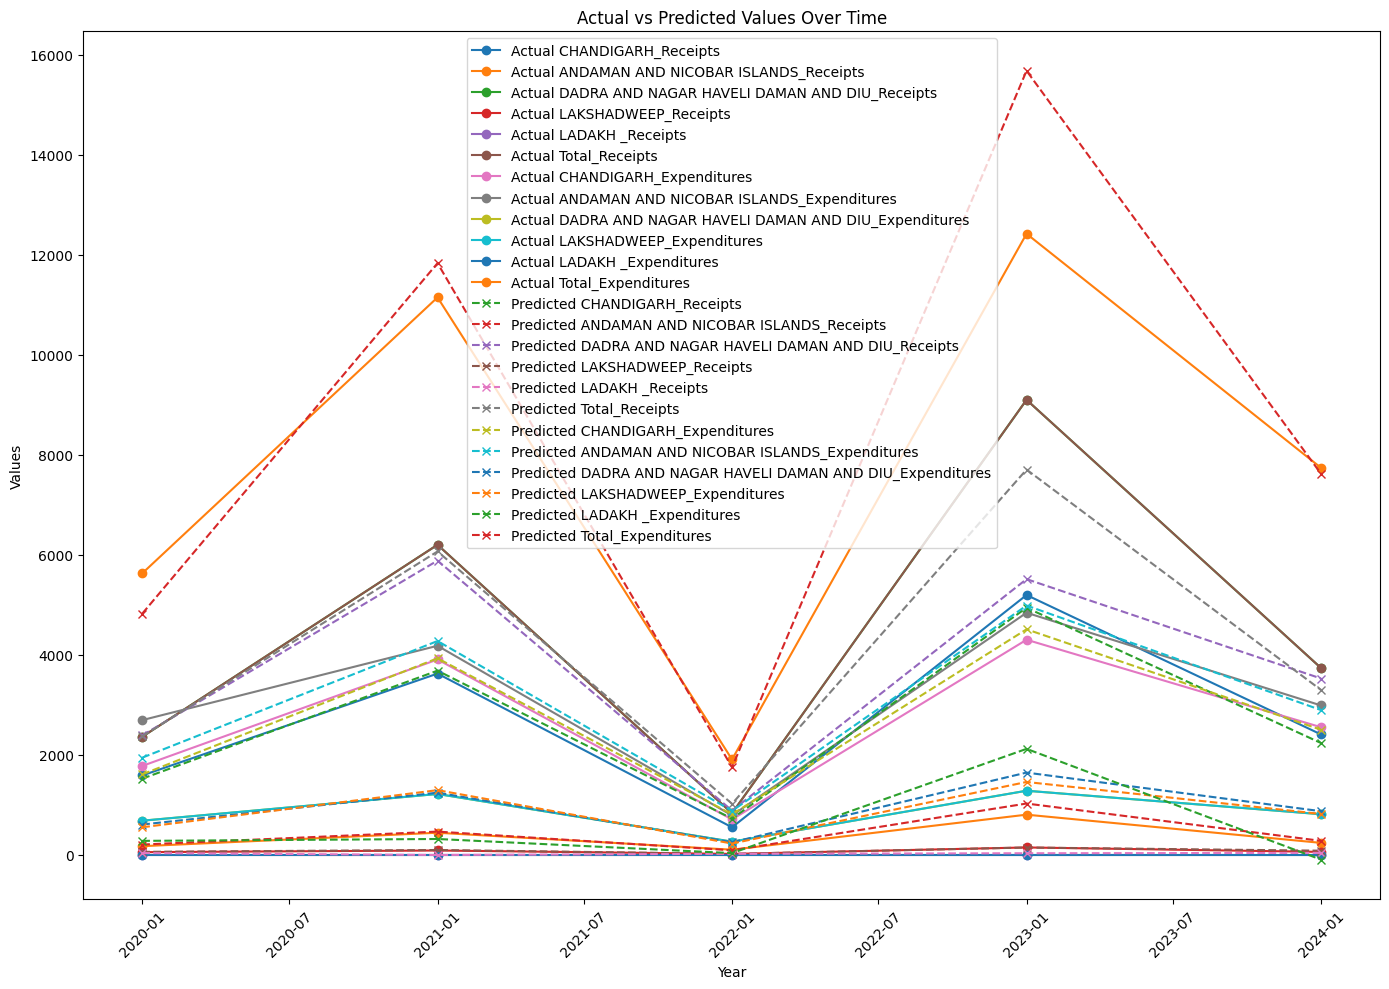

In [ ]:
# Plot each column from actual_df and predicted_df against Year
plt.figure(figsize=(14, 10))

# Plot actual values
for column in actual_df.columns:
    if column != 'Year':  # Skip the Year column
        plt.plot(actual_df['Year'], actual_df[column], label=f'Actual {column}', marker='o')

# Plot predicted values
for column in predicted_df.columns:
    if column != 'Year':  # Skip the Year column
        plt.plot(predicted_df['Year'], predicted_df[column], label=f'Predicted {column}', linestyle='--', marker='x')

# Adding titles and legends
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("Actual DataFrame Columns:", actual_df.columns)
print("Predicted DataFrame Columns:", predicted_df.columns)

Actual DataFrame Columns: Index(['Year', 'CHANDIGARH_Receipts', 'ANDAMAN AND NICOBAR ISLANDS_Receipts',
       'DADRA AND NAGAR HAVELI DAMAN AND DIU_Receipts', 'LAKSHADWEEP_Receipts',
       'LADAKH _Receipts', 'Total_Receipts', 'CHANDIGARH_Expenditures',
       'ANDAMAN AND NICOBAR ISLANDS_Expenditures',
       'DADRA AND NAGAR HAVELI DAMAN AND DIU_Expenditures',
       'LAKSHADWEEP_Expenditures', 'LADAKH _Expenditures',
       'Total_Expenditures'],
      dtype='object')
Predicted DataFrame Columns: Index(['Year', 'CHANDIGARH_Receipts', 'ANDAMAN AND NICOBAR ISLANDS_Receipts',
       'DADRA AND NAGAR HAVELI DAMAN AND DIU_Receipts', 'LAKSHADWEEP_Receipts',
       'LADAKH _Receipts', 'Total_Receipts', 'CHANDIGARH_Expenditures',
       'ANDAMAN AND NICOBAR ISLANDS_Expenditures',
       'DADRA AND NAGAR HAVELI DAMAN AND DIU_Expenditures',
       'LAKSHADWEEP_Expenditures', 'LADAKH _Expenditures',
       'Total_Expenditures'],
      dtype='object')


In [ ]:
# Clean up the actual data frame by dropping the 'index' column
if 'index' in actual_df.columns:
    actual_df.drop(columns=['index'], inplace=True)

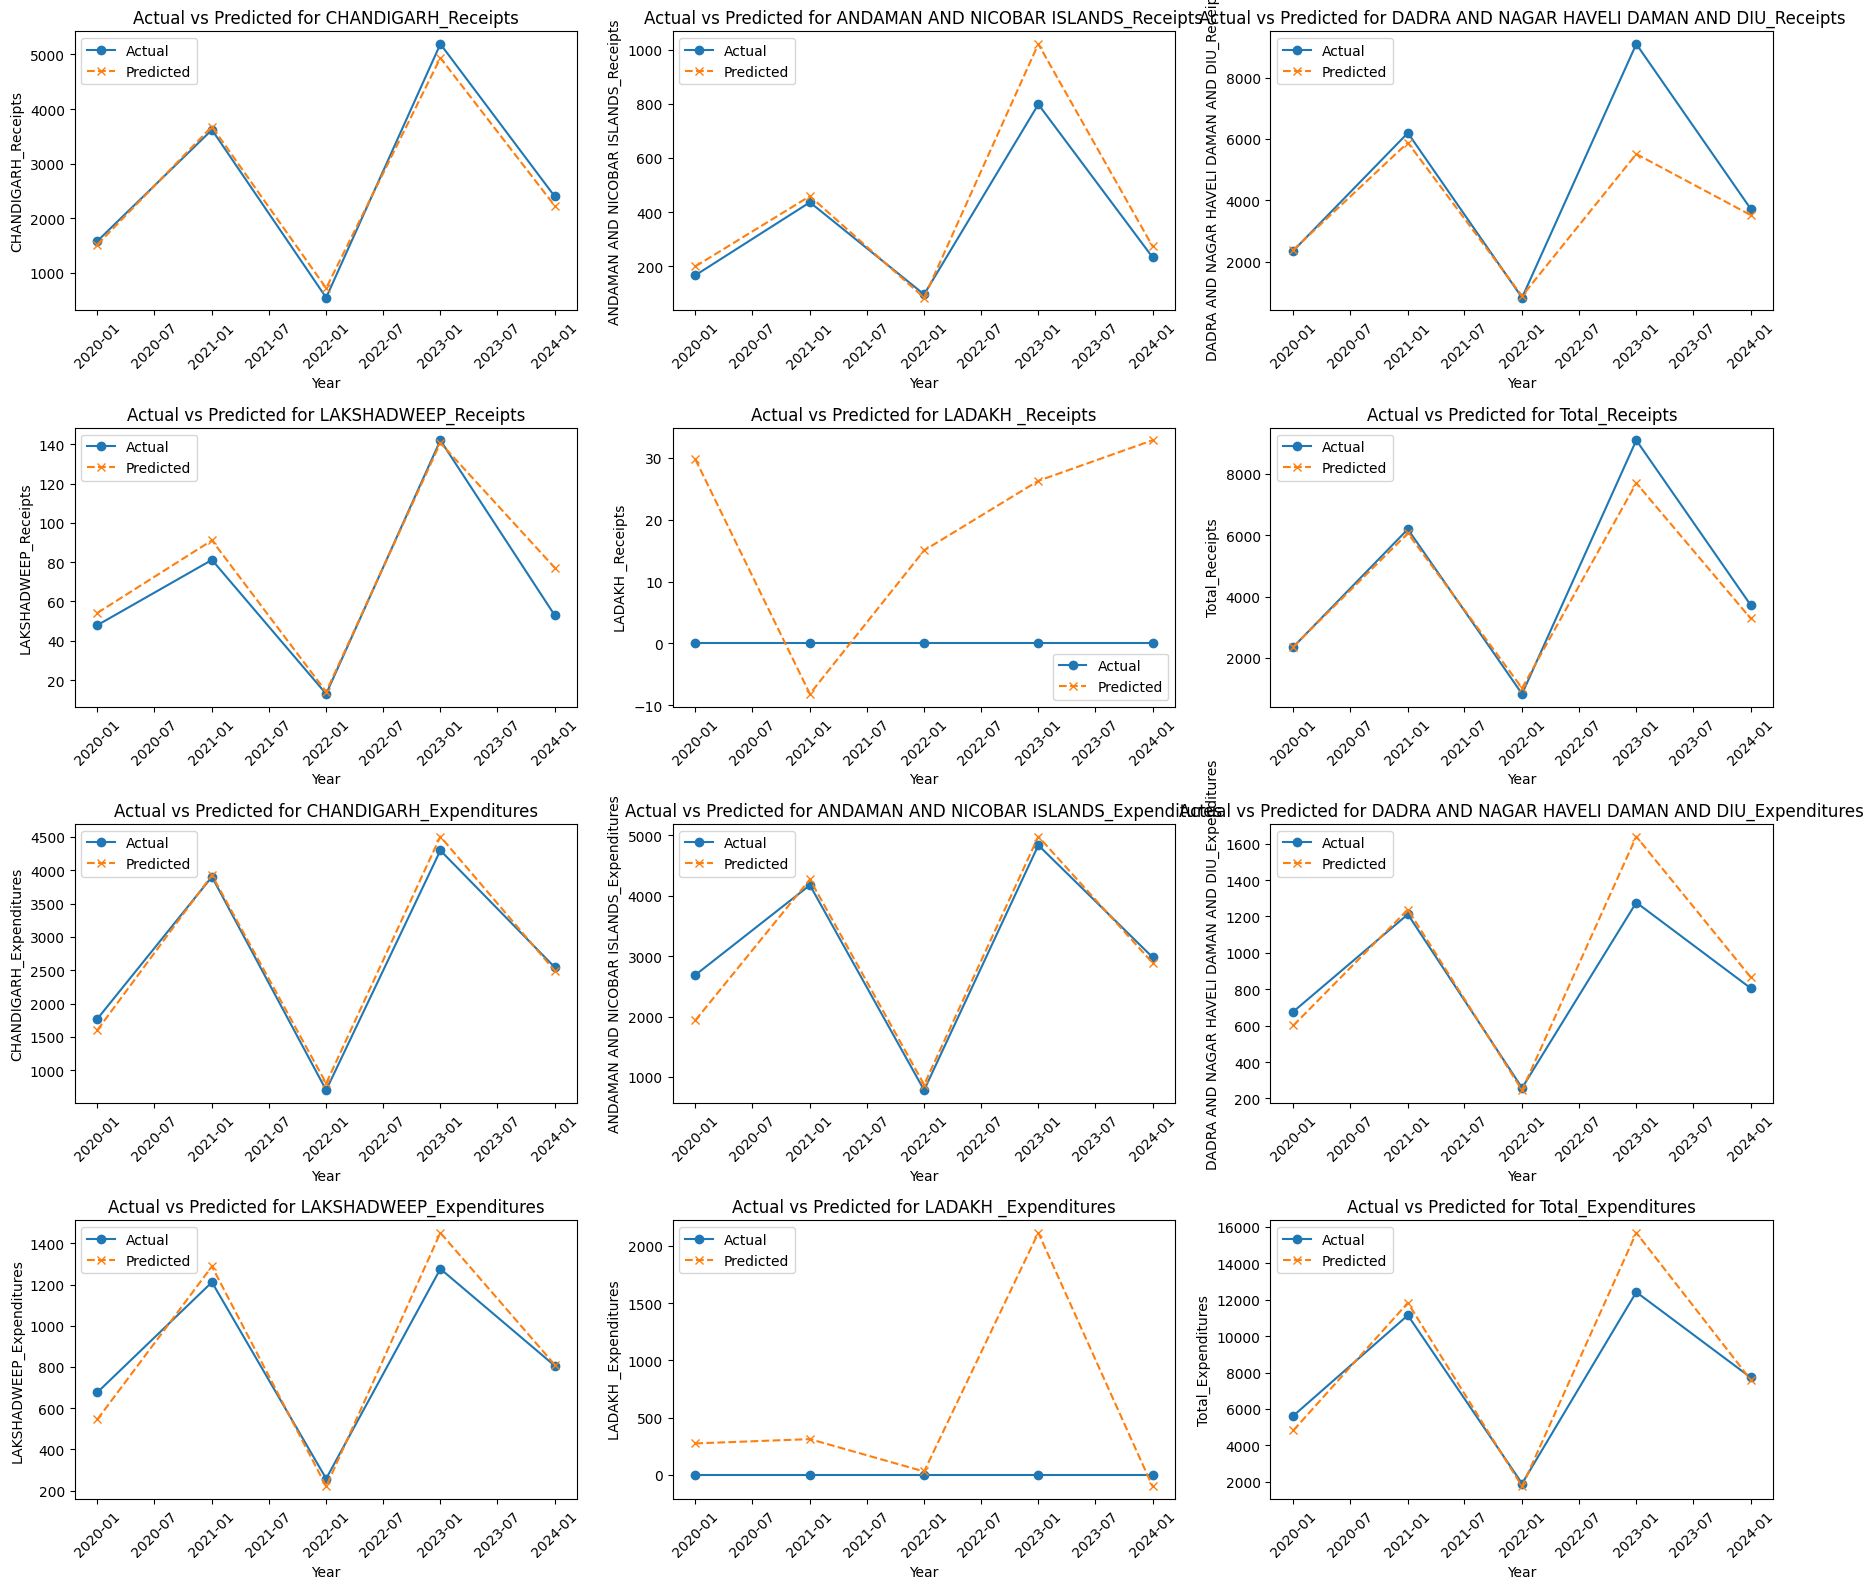

In [ ]:
# Number of regions (excluding Year)
num_regions = len(actual_df.columns) - 1  # Excluding 'Year'

# Step 1: Set up the subplot arrangement
# Determine rows and columns based on the total number of regions
cols = 3  # Number of columns
rows = (num_regions // cols) + (num_regions % cols > 0)

plt.figure(figsize=(18, rows * 4))  # Adjust figure size according to your preference

# Step 2: Plot each column
for i, column in enumerate(actual_df.columns[1:]):  # Skip 'Year'
    plt.subplot(rows, cols, i + 1)  # Dynamic subplot specification
    plt.plot(actual_df['Year'], actual_df[column], label='Actual', marker='o')

    # Plot predicted values
    plt.plot(predicted_df['Year'], predicted_df[column], label='Predicted', linestyle='--', marker='x')

    # Title and labels
    plt.title(f'Actual vs Predicted for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# LSTM model

In [ ]:
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Step 3: Build the LSTM model
model_LSTM = Sequential()
model_LSTM.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define the input shape with Input layer
model_LSTM.add(LSTM(50, activation='relu'))
model_LSTM.add(Dense(y_train.shape[1]))  # Output layer for each region's receipts/expenditures
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Compile the model
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model_LSTM.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             612 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,212 (51.61 KB)

 Trainable params: 13,212 (51.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_LSTM.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1475
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1267
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0701
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0593
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0377 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106
Ep

In [ ]:
# Save the trained LSTM model
model_LSTM.save('model_lstm.h5')

In [ ]:
model_RNN.save('model_rnn.h5')

In [ ]:
# Saving model and scaler

In [ ]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['scaler_merged_1.pkl']

In [ ]:
# Inference

In [2]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

In [8]:
# Load the saved scaler and model
scaler = joblib.load('scaler.pkl')
lstm_model = load_model('model_lstm.h5')
rnn_model = load_model('model_rnn.h5')

In [16]:
df

,Year,CHANDIGARH_Receipts,ANDAMAN AND NICOBAR ISLANDS_Receipts,DADRA AND NAGAR HAVELI DAMAN AND DIU_Receipts,LAKSHADWEEP_Receipts,LADAKH _Receipts,Total_Receipts,CHANDIGARH_Expenditures,ANDAMAN AND NICOBAR ISLANDS_Expenditures,DADRA AND NAGAR HAVELI DAMAN AND DIU_Expenditures,LAKSHADWEEP_Expenditures,LADAKH _Expenditures,Total_Expenditures
0,1998-01-01,425.00,95.72,615.78,8.65,0.00,615.78,545.40,604.20,137.30,137.30,0.00,1404.00
1,1999-01-01,473.00,88.92,683.41,9.03,0.00,683.41,632.16,631.50,162.27,162.27,0.00,1565.81
2,2000-01-01,495.00,90.99,728.29,9.42,0.00,728.29,676.64,698.00,196.27,196.27,0.00,1719.63
3,2001-01-01,544.82,96.60,826.41,13.00,0.00,826.41,702.50,782.23,257.58,257.58,0.00,1901.84
4,2002-01-01,684.99,93.78,1020.66,18.10,0.00,1020.66,758.35,885.00,253.19,253.19,0.00,2080.04
5,2003-01-01,748.83,89.16,1103.40,18.73,0.00,1103.40,864.95,992.23,233.64,233.64,0.00,2287.75
6,2004-01-01,821.78,102.08,1241.70,21.01,0.00,1241.70,893.00,1027.00,226.24,226.24,0.00,2404.90
7,2005-01-01,960.00,108.62,1461.69,19.36,0.00,1461.69,994.43,1675.59,241.04,241.04,0.00,3141.28
8,2006-01-01,1090.80,115.35,1712.43,24.10,0.00,1712.43,1032.90,1977.93,381.81,381.81,0.00,3636.03
9,2007-01-01,1278.62,124.63,2153.05,33.75,0.00,2153.05,1104.91,1854.83,444.58,444.58,0.00,3666.87


In [17]:

# Load dataset (Ensure Year column is datetime)
# df = pd.read_csv("your_data.csv")  # Change this to your actual file
df["Year"] = pd.to_datetime(df["Year"])

# Extract last available date
last_date = df["Year"].max()
print("Last Date in Dataset:", last_date)

Last Date in Dataset: 2024-01-01 00:00:00


In [18]:
# Extract numerical values (excluding "Year" column) and scale
data_values = df.drop(columns=["Year"]).values
scaled_data = scaler.transform(data_values)

In [19]:
# scaled_data

In [20]:
# Define sequence length and number of years to predict
seq_length = 3
num_years_to_predict = 1

In [21]:
# Get the last sequence from the scaled dataset
last_sequence = scaled_data[-seq_length:]  # Shape: (seq_length, features)
last_sequence

array([[1.        , 0.81641084, 0.21974261, 0.70186606, 0.21641117,
        0.85412603, 0.80896102, 0.94740398, 0.89066223, 0.92951656,
        0.99822418, 0.9195328 ],
       [0.94311052, 0.90256657, 0.23266184, 0.77548035, 0.35039795,
        0.86219962, 0.91989663, 1.        , 0.93091384, 0.92951656,
        1.        , 0.96677186],
       [0.97626744, 1.        , 0.28699174, 1.        , 1.        ,
        1.        , 1.        , 0.99975568, 1.        , 1.        ,
        1.        , 1.        ]])

In [22]:
last_sequence = np.reshape(last_sequence, (1, seq_length, last_sequence.shape[1]))
last_sequence

array([[[1.        , 0.81641084, 0.21974261, 0.70186606, 0.21641117,
         0.85412603, 0.80896102, 0.94740398, 0.89066223, 0.92951656,
         0.99822418, 0.9195328 ],
        [0.94311052, 0.90256657, 0.23266184, 0.77548035, 0.35039795,
         0.86219962, 0.91989663, 1.        , 0.93091384, 0.92951656,
         1.        , 0.96677186],
        [0.97626744, 1.        , 0.28699174, 1.        , 1.        ,
         1.        , 1.        , 0.99975568, 1.        , 1.        ,
         1.        , 1.        ]]])

In [23]:
# Store predictions
predictions_lstm = []
predictions_rnn = []
# Generate predictions for the next 'num_years_to_predict' years
for i in range(num_years_to_predict):
    next_prediction = lstm_model.predict(last_sequence)  # Predict next year
    predictions_lstm.append(next_prediction[0])  # Store prediction

    # Update last_sequence by removing the first value and appending the new prediction
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction.reshape(1, 1, -1), axis=1)

for i in range(num_years_to_predict):
    next_prediction = rnn_model.predict(last_sequence)  # Predict next year
    predictions_rnn.append(next_prediction[0])  # Store prediction

    # Update last_sequence by removing the first value and appending the new prediction
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction.reshape(1, 1, -1), axis=1)

# Convert predictions back to original scale
predictions_lstm = scaler.inverse_transform(predictions_lstm)
print('LSTM predictions')
print(predictions_lstm)

# Convert predictions back to original scale

predictions_rnn = scaler.inverse_transform(predictions_rnn)
print('RNN predictions')
print(predictions_rnn)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
LST predictions
[[ 6547.71140319  2336.26232554  1996.97742459   325.07849457
   1327.85664729 13952.45072277  6792.07349774  7147.41386444
   3104.17151291  1510.67613192  8630.06308381 24409.15900467]]
RNN predictions
[[ 6064.88883854  1792.48984259 -2023.95191354   369.30900031
   1267.21170463 14335.27347774  4544.82143927  7909.33308865
   3490.25298878  1517.57768564 10130.82170246 30024.97221189]]


In [24]:
# Generate next year dates
future_dates = [last_date.replace(year=last_date.year + i ) for i in range(1, num_years_to_predict + 1)]

# Convert predictions into a DataFrame
predictions_df = pd.DataFrame(predictions_rnn, columns=df.columns[1:], index=future_dates)
predictions_df.reset_index(inplace=True)
predictions_df.rename(columns={"index": "Year"}, inplace=True)

# Append predictions to the original DataFrame
df_extended = pd.concat([df, predictions_df])

In [25]:

df_extended

,Year,CHANDIGARH_Receipts,ANDAMAN AND NICOBAR ISLANDS_Receipts,DADRA AND NAGAR HAVELI DAMAN AND DIU_Receipts,LAKSHADWEEP_Receipts,LADAKH _Receipts,Total_Receipts,CHANDIGARH_Expenditures,ANDAMAN AND NICOBAR ISLANDS_Expenditures,DADRA AND NAGAR HAVELI DAMAN AND DIU_Expenditures,LAKSHADWEEP_Expenditures,LADAKH _Expenditures,Total_Expenditures
0,1998-01-01,425.000000,95.720000,615.780000,8.650,0.000000,615.780000,545.400000,604.200000,137.300000,137.300000,0.000000,1404.000000
1,1999-01-01,473.000000,88.920000,683.410000,9.030,0.000000,683.410000,632.160000,631.500000,162.270000,162.270000,0.000000,1565.810000
2,2000-01-01,495.000000,90.990000,728.290000,9.420,0.000000,728.290000,676.640000,698.000000,196.270000,196.270000,0.000000,1719.630000
3,2001-01-01,544.820000,96.600000,826.410000,13.000,0.000000,826.410000,702.500000,782.230000,257.580000,257.580000,0.000000,1901.840000
4,2002-01-01,684.990000,93.780000,1020.660000,18.100,0.000000,1020.660000,758.350000,885.000000,253.190000,253.190000,0.000000,2080.040000
5,2003-01-01,748.830000,89.160000,1103.400000,18.730,0.000000,1103.400000,864.950000,992.230000,233.640000,233.640000,0.000000,2287.750000
6,2004-01-01,821.780000,102.080000,1241.700000,21.010,0.000000,1241.700000,893.000000,1027.000000,226.240000,226.240000,0.000000,2404.900000
7,2005-01-01,960.000000,108.620000,1461.690000,19.360,0.000000,1461.690000,994.430000,1675.590000,241.040000,241.040000,0.000000,3141.280000
8,2006-01-01,1090.800000,115.350000,1712.430000,24.100,0.000000,1712.430000,1032.900000,1977.930000,381.810000,381.810000,0.000000,3636.030000
9,2007-01-01,1278.620000,124.630000,2153.050000,33.750,0.000000,2153.050000,1104.910000,1854.830000,444.580000,444.580000,0.000000,3666.870000


In [26]:
# Save the updated DataFrame
df_extended.to_excel("predicted_dataset.xlsx", index=False, engine='openpyxl')

In [27]:

# Print the updated DataFrame
df_extended.tail(num_years_to_predict + 5) # Show last few rows including predictions

,Year,CHANDIGARH_Receipts,ANDAMAN AND NICOBAR ISLANDS_Receipts,DADRA AND NAGAR HAVELI DAMAN AND DIU_Receipts,LAKSHADWEEP_Receipts,LADAKH _Receipts,Total_Receipts,CHANDIGARH_Expenditures,ANDAMAN AND NICOBAR ISLANDS_Expenditures,DADRA AND NAGAR HAVELI DAMAN AND DIU_Expenditures,LAKSHADWEEP_Expenditures,LADAKH _Expenditures,Total_Expenditures
22,2020-01-01,5703.040000,1712.400000,2215.000000,172.120,0.000000,9802.560000,4641.890000,5188.580000,2189.410000,1349.710000,6112.650000,19482.240000
23,2021-01-01,5675.040000,1270.670000,2251.020000,169.220,223.960000,9589.910000,4661.120000,5317.410000,2204.590000,1440.560000,5958.000000,19581.680000
24,2022-01-01,6250.330000,1464.360000,2479.450000,186.180,246.620000,10626.940000,4852.810000,5722.730000,2380.130000,1394.750000,6273.250000,20623.670000
25,2023-01-01,5918.930000,1609.510000,2589.020000,204.800,399.310000,10721.570000,5443.500000,6006.890000,2481.490000,1394.750000,6284.410000,21611.040000
26,2024-01-01,6112.080000,1773.660000,3049.800000,261.590,1139.590000,12336.720000,5870.020000,6005.570000,2655.460000,1490.100000,6284.410000,22305.560000
0,2025-01-01,6064.888839,1792.489843,-2023.951914,369.309,1267.211705,14335.273478,4544.821439,7909.333089,3490.252989,1517.577686,10130.821702,30024.972212
